# <center><font color="green"> https://bit.ly/ptpjb-2021-11</font></center>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/ptpjb-2021-11)

# <center><font color="blue">11 - Introduction to Classification models</font></center>

<center><img alt="" src="images/cover_ptpjb_2021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

# <center><font color="blue"> Outline: Introduction to Classification models</font></center>

* Pendahuluan Model Klasifikasi
* k-Nearest Neighbour
* Evaluasi Dasar
* Underfitting-Overfitting
* Cross-validasi
* Regresi Logistik
* Naive Bayes
* Decision Tree dan Random Forest

<img style="undefined: undefined;" src="images/meme-cartoon/meme_08-Classification_Prediction.png" width="420" height="236" />

# <center><font color="blue">  Variabel target (dependent) dan prediktor (independent)</font></center>

<img style="undefined: undefined;" src="images/Dependent-Independent.png" width="294" height="197" />

* **Variable Target**: adalah satu atau lebih variabel yang dipengaruhi oleh satu atau lebih variabel yang lain.
Contoh: Variabel gaji dipengaruhi oleh variabel lama kerja, pangkat serta jabatan seorang pegawai.
Variable 
* **Variabel Prediktor** : adalah satu atau lebih variabel yang mempengaruhi satu atau lebih variabel yang lain.
Contoh: Variabel kecepatan mempengaruhi waktu tempuh perjalanan.
* **Variabel Kontrol**: adalah variabel/elemen yang nilainya tetap (konstan), biasanya pada suatu eksperimen untuk menguji hubungan antara variabel target dan prediktor.
Contoh: Penggunaan Placebo (obat palsu) pada penelitian/eksperimen efek suatu obat tertentu.
* **Variable Confounding** Biasa juga disebut sebagai “variabel ketiga” atau “variabel mediator”, yaitu suatu (extra*) variabel yang mempengaruhi hubungan antara variabel dependent dan independent.
Contoh: Pada penelitian tentang dampak olahraga (prediktor) terhadap berat badan (target), maka variabel lain seperti pola makan dan usia juga akan mempengaruhi.

# <center><font color="blue">Pentingnya Domain Knowledge</font></center>

<img alt="" src="images/meme-cartoon/meme-dependent-independent var.jpg"/>

# <center><font color="blue">Bentuk Struktur Data Masalah Klasifikasi</font></center>

* Klasifikasi adalah permasalahan meng-kategorisasikan sekelompok observasi baru ke sekumpulan kategori (kelas) yang ada sebelumnya. 
* Mengacu ke Gambar dibawah, klasifikasi digunakan jika variabel target bertipe kategorik dan prediktornya satu atau lebih variabel numerik dan-atau kategorik. 

<p><img src="images/iris_flower.png" alt="" width="414" height="310" /></p>

# <center><font color="blue">Aplikasi Model Klasifikasi</font></center>

<img alt="" src="images/machine learning classification applications.png"/>

# <center><font color="blue"> Berbagai Pendekatan ke Klasifikasi</font></center>

* Terdapat cukup banyak model klasifikasi yang dapat digunakan, mulai dari yang klasik seperti Linear Discriminant Analysis (LDA) dan regresi logistik, lalu ke moderate seperti SVM (support vector machines), decision tree dan neural network (jaringan syaraf tiruan), sampai yang lebih terkini seperti random forest,  dan deep learning. 
* Masing-masing memiliki kelebihan dan kekurangan masing-masing bergantung pada bagaimana model/algoritmanya. 

<img alt="" src="images/Berbagai_Macam_Pendekatan_Klasifikasi.png"/>

# <center><font color="blue">Induktif Bias Sebagai Dasar Penting untuk Mengerti SEMUA model Data Science dan Machine Learning</font></center>

<img alt="" src="images/inductive_biases.png" />

image source: https://sgfin.github.io/2020/06/22/Induction-Intro/

# <center><font color="blue">Permasalahan Klasifikasi</font></center>

<p><img alt="" src="images/masalah_klasifikasi.png" /></p>

* Misal diberikan permasalahan terdapat dua buah kategori orange dan ungu seperti di gambar.
* Setiap titik di ganmbar adalah entitas dari data yang terdiri dari beberapa variabel.
* Jika diberikan titik baru (warna putih), maka masalah klasifikkasi adalah kemudian menggolongkan data baru ini ke kategori titik Orange atau Ungu.

## <font color="green">Mari membahas teori Bersamaan Dengan Implementasinya</font>

In [1]:
!pip install graphviz dtreeviz

In [2]:
import warnings; warnings.simplefilter('ignore')
import graphviz, pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from dtreeviz.trees import *
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

# <center><font color="blue">Kasus Sederhana Klasifikasi 01: Klasifikasi Spesies Bunga Iris</font></center>

* Data klasifikasi bunga Iris sebagai studi kasus sederhana
* Link data: https://archive.ics.uci.edu/ml/datasets/iris
* Paper sumber data: Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950). 
* Masalah klasifikasinya adalah mengklasifikasikan jenis Bunga Iris berdasarkan bentuk (e.g. panjang dan lebar) bunga.

<img src="images/iris_flower.png" alt="" width="503" height="377" />

In [3]:
# Load data Bunga Iris
data = sns.load_dataset("iris")
print(data.shape)
data.sample(5)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
71,6.1,2.8,4.0,1.3,versicolor
60,5.0,2.0,3.5,1.0,versicolor
4,5.0,3.6,1.4,0.2,setosa
136,6.3,3.4,5.6,2.4,virginica
8,4.4,2.9,1.4,0.2,setosa


In [4]:
data['species'] = data['species'].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


In [5]:
print("Duplikasi = ", data.duplicated().sum())
print(data.isnull().sum())

Duplikasi =  1
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
data.drop_duplicates(keep="first", inplace=True)
print("Duplikasi = ", data.duplicated().sum())

Duplikasi =  0


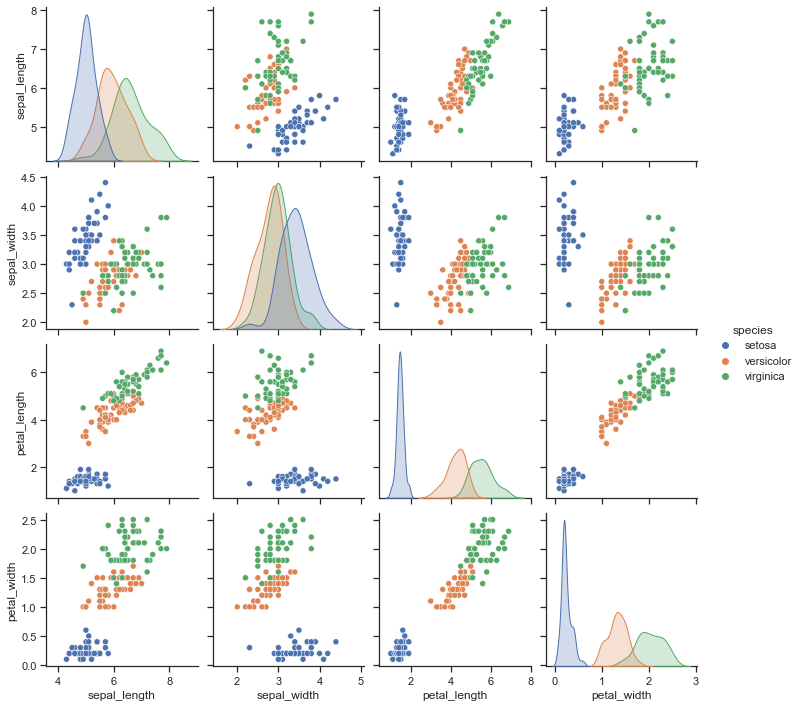

In [7]:
p = sns.pairplot(data, hue="species")

In [8]:
# Kita membuat dataframe baru, hati-hati jika datanya besar.
df1 = data[['sepal_length','sepal_width','petal_length','petal_width']]
y1 = data['species']
df1.shape, y1.shape

((149, 4), (149,))

# <center><font color="blue">Kasus Sederhana Klasifikasi 02: Efisiensi Energy Gedung</font></center>

* Terdapat 12 Macam bentuk Gedung disimulasikan dalam EcoTect. Gedung-gedung tersebut berbeda menurut beberapa parameter (e.g. glazing area, the glazing area distribution, and the orientation). 
* Dari parameter tadi terdapat 768 bentuk gedung dan 8 variabel.
* aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.
* Link data: https://archive.ics.uci.edu/ml/datasets/energy+efficiency
* Paper sumber data: A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012

<img src="images/buildings-by-calibrated-simulation.png" alt="" width="503" height="377" />

In [9]:
file_ = "data/building-energy-efficiency-ENB2012_data.csv"

try: # Running Locally, yakinkan "file_" berada di folder "data"
    data = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/{file_}
    data = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
print(data.shape)
data.sample(5)

(768, 12)


,compactness,surface-area,wall-area,roof-area,overall-height,orientation,glazing-area,glazing-dist,heating-load,cooling-load,heat-cat,cool-cat
550,0.76,661.5,416.5,122.5,7.0,4,0.40,1,40.71,40.63,40,40
163,0.79,637.0,343.0,147.0,7.0,5,0.10,3,36.70,34.29,36,34
302,0.82,612.5,318.5,147.0,7.0,4,0.25,1,26.97,27.25,26,27
41,0.64,784.0,343.0,220.5,3.5,3,0.00,0,10.54,16.80,10,16
295,0.90,563.5,318.5,122.5,7.0,5,0.25,1,32.00,37.58,32,37


# <center><font color="blue">PreProcessing & Minor EDA</font></center>

* Preprocessing apa yang diperlukan?

In [10]:
print(data.info())
print(set(data["orientation"]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   compactness     768 non-null    float64
 1   surface-area    768 non-null    float64
 2   wall-area       768 non-null    float64
 3   roof-area       768 non-null    float64
 4   overall-height  768 non-null    float64
 5   orientation     768 non-null    int64  
 6   glazing-area    768 non-null    float64
 7   glazing-dist    768 non-null    int64  
 8   heating-load    768 non-null    float64
 9   cooling-load    768 non-null    float64
 10  heat-cat        768 non-null    int64  
 11  cool-cat        768 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 72.1 KB
None
{2, 3, 4, 5}


In [11]:
data['orientation'] = data['orientation'].astype('category')
data['heat-cat'] = data['heat-cat'].astype('category')
data['cool-cat'] = data['cool-cat'].astype('category')
data.describe(include="all")

,compactness,surface-area,wall-area,roof-area,overall-height,orientation,glazing-area,glazing-dist,heating-load,cooling-load,heat-cat,cool-cat
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.0,768.000000,768.00000,768.000000,768.000000,768.0,768.0
unique,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,37.0,39.0
top,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,12.0,14.0
freq,NaN,NaN,NaN,NaN,NaN,192.0,NaN,NaN,NaN,NaN,84.0,82.0
mean,0.764167,671.708333,318.500000,176.604167,5.25000,NaN,0.234375,2.81250,22.307195,24.587760,NaN,NaN
std,0.105777,88.086116,43.626481,45.165950,1.75114,NaN,0.133221,1.55096,10.090204,9.513306,NaN,NaN
min,0.620000,514.500000,245.000000,110.250000,3.50000,NaN,0.000000,0.00000,6.010000,10.900000,NaN,NaN
25%,0.682500,606.375000,294.000000,140.875000,3.50000,NaN,0.100000,1.75000,12.992500,15.620000,NaN,NaN
50%,0.750000,673.750000,318.500000,183.750000,5.25000,NaN,0.250000,3.00000,18.950000,22.080000,NaN,NaN
75%,0.830000,741.125000,343.000000,220.500000,7.00000,NaN,0.400000,4.00000,31.667500,33.132500,NaN,NaN


In [12]:
print("Duplikasi = ", data.duplicated().sum())
print(data.isnull().sum())

Duplikasi =  0
compactness       0
surface-area      0
wall-area         0
roof-area         0
overall-height    0
orientation       0
glazing-area      0
glazing-dist      0
heating-load      0
cooling-load      0
heat-cat          0
cool-cat          0
dtype: int64


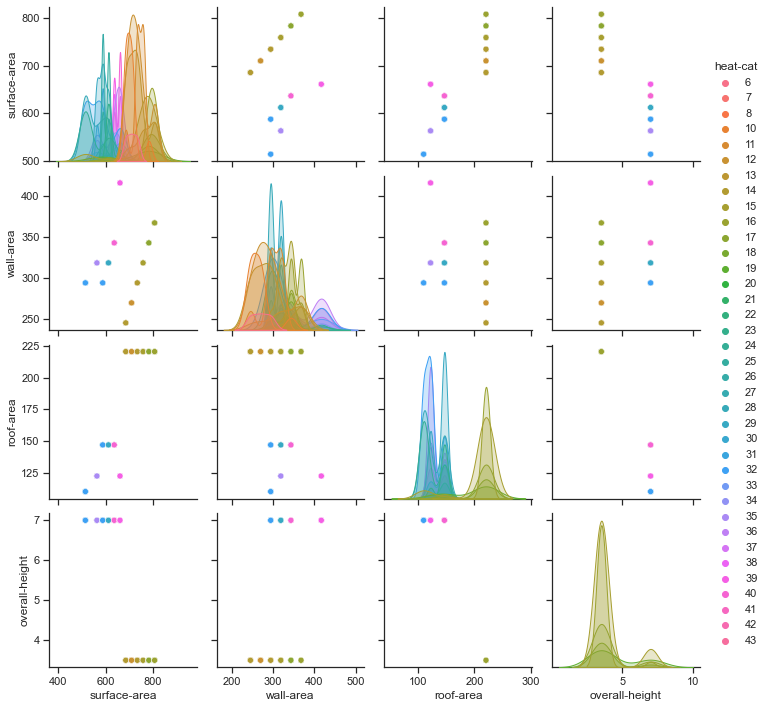

In [13]:
# Warning agak lambat karena plot yg di generate cukup banyak 
col_ = "surface-area wall-area roof-area overall-height heat-cat".split()
p = sns.pairplot(data[col_], hue="heat-cat")

12    84
14    67
32    56
11    45
15    45
10    43
28    43
29    38
36    31
24    31
16    27
13    26
35    20
17    17
39    16
40    16
26    16
25    16
19    13
33    12
31    12
6     12
23    12
18    10
41    10
38     9
42     8
27     5
22     5
37     5
7      4
34     4
8      4
30     2
20     2
21     1
43     1
Name: heat-cat, dtype: int64


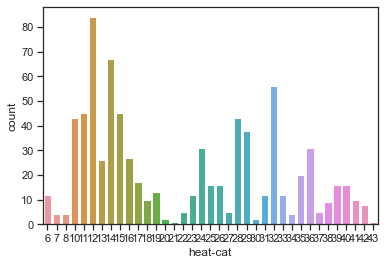

In [14]:
# Challenge of the prediction
print(data["heat-cat"].value_counts())
p = sns.countplot(x="heat-cat", data=data)

In [15]:
data["orientation"].value_counts()

2    192
3    192
4    192
5    192
Name: orientation, dtype: int64

In [16]:
# One-hot encoding, lalu menggabungkan dengan data awal
dum_ = pd.get_dummies(data['orientation'], prefix='ori')
data = pd.concat([data, dum_], axis = 1)
data.head()

,compactness,surface-area,wall-area,roof-area,overall-height,orientation,glazing-area,glazing-dist,heating-load,cooling-load,heat-cat,cool-cat,ori_2,ori_3,ori_4,ori_5
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,15,21,1,0,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,15,21,0,1,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,15,21,0,0,1,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,15,21,0,0,0,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,20,28,1,0,0,0


In [17]:
df2A = data[['compactness', 'surface-area', 'wall-area', 'roof-area', \
            'overall-height','orientation','glazing-area','glazing-dist']]
df2B = data[['compactness', 'surface-area', 'wall-area', 'roof-area', \
            'overall-height','ori_2', 'ori_3', 'ori_4', 'ori_5','glazing-area','glazing-dist']]
y2 = data['heat-cat']
df2B.head()

,compactness,surface-area,wall-area,roof-area,overall-height,ori_2,ori_3,ori_4,ori_5,glazing-area,glazing-dist
0,0.98,514.5,294.0,110.25,7.0,1,0,0,0,0.0,0
1,0.98,514.5,294.0,110.25,7.0,0,1,0,0,0.0,0
2,0.98,514.5,294.0,110.25,7.0,0,0,1,0,0.0,0
3,0.98,514.5,294.0,110.25,7.0,0,0,0,1,0.0,0
4,0.90,563.5,318.5,122.50,7.0,1,0,0,0,0.0,0


# <center><font color="blue">Sebelum dimulai Data Kita Pisahkan Menjadi Train dan Test: Mengapa?</font></center>

<p><img src="images/data train val test separation.png" width="416" height="327" /></p>

* Bagaimana membagi Porsi Train VS Porsi Test Data?
* <font color="red">**Hati-hati** dalam memisahkan data Train dan Test: Mengapa?</font>

In [18]:
df1_train, df1_test, y1_train, y1_test = train_test_split(df1, y1, test_size=0.3, random_state=33)
df2A_train, df2A_test, y2_train, y2_test = train_test_split(df2A, y2, test_size=0.3, random_state=33) #No One-Hot
df2B_train, df2B_test, y2_train, y2_test = train_test_split(df2B, y2, test_size=0.3, random_state=33) # One-Hot
print(df1_train.shape, df1_test.shape)
print(df2A_train.shape, df2A_test.shape)

(104, 4) (45, 4)
(537, 8) (231, 8)


# <center><font color="blue">Sampel ke Populasi: Underfitting dan overfitting</font></center>

<img src="images/under-over_Fitting.jpg" alt="" width="564" height="568" />

<p><img src="images/meme-cartoon/meme overfitting.png" width="556" height="282" /></p>

# <center><font color="blue">Parsimoni: Simple is the Best</font></center>

<img src="images/sweet_spot.png" alt="" width="538" height="318" />

# <center><font color="blue">k-Nearest Neighbour</font></center>

<ul>
<li>Classifier yang paling sederhana, namun dapat juga digunakan untuk regresi (dan bahkan clustering).</li>
<li>Sering disebut sebagai <u><strong>Instance based Learner</strong></u></li>
<li>Tidak memiliki "persamaan", pendekatannya lebih ke algoritmik berdasarkan konsep jarak/similarity</li>
<li>Mirip konsep DBSCAN</li>
</ul>
<p><img src="images/6_kNN.JPG" alt="" width="702" height="296" /></p>

# <center><font color="blue">k-NN Neighbour Size & Weights</font></center>

<p><img alt="" src="images/k-NN_neighbour_size.png" /></p>

<ul>
	<li><big><strong>Uniform</strong></big>: all points in each neighborhood are weighted equally.</li>
	<li><big><strong>Distance</strong></big>: closer neighbors of a query point have a greater influence than the neighbors further away.</li>
</ul>


# <center><font color="blue">Similarity VS Distance</font></center>

<p><img src="images/other_Distance.gif" alt="" width="498" height="236" /></p>

## Similarity explained in plain terms and its application in Python
### http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/

# <center><font color="blue">Kelebihan dan Kekurangan</font></center>

<dl>
	<dt><strong>Pros:</strong></dt>
	<dd>
	<ul>
		<li>Relatif cepat (efisien) untuk data yang tidak terlalu besar</li>
		<li>Sederhana, mudah untuk diimplementasikan</li>
		<li>Mudah untuk di modifikasi: Berbagai macam formula jarak/similaritas</li>
		<li>Menangani data Multiclass dengan mudah</li>
		<li>Akurasi cukup baik jika data representatif</li>
	</ul>
	</dd>
	<dt><strong>Cons:</strong></dt>
	<dd>
	<ul>
		<li>Menemukan&nbsp;nearest neighbours tidak efisien untuk data besar</li>
		<li>Storage of data</li>
		<li>Meyakinkan rumus jarak yang tepat</li>
	</ul>
	</dd>
</dl>

## <font color="green">Aplikasi di Python</font>

In [19]:
# k-NN: http://scikit-learn.org/stable/modules/neighbors.html
n_neighbors = 3
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(df1_train, y1_train)
print('Done!')

Done!


In [20]:
# Prediksi dengan k-NN
y_kNN1 = kNN.predict(df1_test)
y_kNN1[-10:]

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [42]:
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(df2B_train, y2_train)
y_kNN2 = kNN.predict(df2B_test)
y_kNN2[-10:]

array([13, 25, 29, 29, 29, 17, 10, 39, 10, 11], dtype=int64)

# <center><font color="blue">Seberapa Baik Hasil Prediksi Ini?: Evaluation Metrics</font></center>

* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    
<center><img alt="" src="images/classification_metrics.png" style="height: 400px;"/></center>

# <center><font color="blue">Confusion Matrix</font></center>

<p><img alt="" src="images/confusion_matrix.png" /></p>

<ul>
	<li>sensitivity, recall, hit rate, or true positive rate (TPR)</li>
	<li>precision or positive predictive value (PPV)</li>
</ul>


<p><img alt="" src="images/ex-F1-Score.png" /></p>
* Yang mana kategori yang "positif"?

<p><img alt="" src="images/F-beta-Score.png" /></p>

* $0\leq F\leq 1$, 1 optimal value
* $0\leq\beta< \inf$
* beta < 1 lends more weight to precision, 
* beta > 1 favors recall 
* beta -> 0 considers only precision 
* beta -> inf only recall

# <center><font color="blue">Micro VS Macro Metric</font></center>

<p><img src="images/micro-vs-macro-f-score.png" alt="" width="790" height="244" /></p>

### <font color="green">Pada 2 kasus diatas:</font>
* sebaiknya Micro atau macro?
* Mana yang lebih penting Presisi atau Recall?

In [22]:
print("Kasus 01 - Bunga Iris: kNN")
print(confusion_matrix(y1_test, y_kNN1))
print(classification_report(y1_test, y_kNN1))

Kasus 01 - Bunga Iris: kNN
[[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [23]:
print("Kasus 02 - Building Energy")
print(confusion_matrix(y2_test, y_kNN2))
print(classification_report(y2_test, y_kNN2))

Kasus 02 - Building Energy
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]]
              precision    recall  f1-score   support

           6       1.00      0.33      0.50         3
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
          10       0.13      0.15      0.14        13
          11       0.15      0.14      0.15        14
          12       0.06      0.08      0.07        25
          13       0.06      0.12      0.08         8
          14       0.00      0.00      0.00        22
          15       0.22      0.17      0.19        12
          16       0.18      0.25      0.21         8
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.0

# <center><font color="blue">Cross Validation</font></center>

* Evaluasi yang kita lakukan belum cukup valid/objektif ... Mengapa?

<img alt="" src="images/6_Cross_validation.png" />

In [24]:
# Cross validation
# Perhatikan variabelnya, kita sekarang menggunakan seluruh data
# namun sebaiknya hanya Train data (jika datanya cukup besar)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
mulai = time.time()
scores_kNN = cross_val_score(kNN, df1, y1, cv=10)
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy k-NN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

Accuracy k-NN: 0.97 (+/- 0.09), Waktu = 0.204 detik


0.8666666666666667

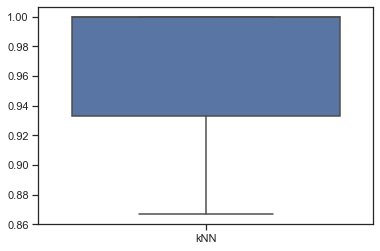

In [25]:
# Visualisasi untuk mengevaluasi model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN})
p = sns.boxplot(data = df_)
min(scores_kNN)

# <center><font color="blue">Klasifikasi dengan Model Regresi Logistik</font></center>

<p><img alt="" src="images/klas_regLogistik.png" /></p>

* Mencari garis lurus yang sedemikian sehingga kesalahan prediksinya sekecil mungkin (lihat gambar)
* Awalnya regresi logistik adalah metode klasifikasi binary: membedakan antara 2 kelas atau kategori.
* Masalah klasifikasi binary contohnya memprediksi seseorang terkena "kanker" atau "tidak kanker", kanker jinak/ganas, fraud atau bukan fraud (pada transaksi keuangan), negatif/positif dalam sentimen analisis, dsb.
* Regresi logistik adalah pengembangan dari model regresi liniear, namun di konversi ke masalah klasifikasi.

# <center><font color="blue">Regresi Logistik</font></center>

<p><img src="images/reg_to_log.png" alt="" width="591" height="298" /></p>

* http://www.saedsayad.com/logistic_regression.htm
* Makna fungsi logarithm?
* Konsekuensi dari rumus $\beta$ diatas?
* Asumsi?

# <center><font color="blue">Kaitan Regresi Logistik dan Neural Network/Deep Learning</font></center>

<p><img src="images/logReg_NN_DL.png" alt="" width="262" height="263" /></p>

<p><img src="images/Fungsi_Sigmoid_.png" alt="" width="624" height="416" /></p>

# <center><font color="blue">Kelebihan dan Kekurangan Regresi Logistik</font></center>

<p><img alt="" src="images/LogReg_When2use.png" /></p>


In [26]:
reglog = LogisticRegression().fit(df1_train, y1_train)
y_reglog1 = reglog.predict(df1_test)
print("Kasus 01 - Bunga Iris: Regresi Logistik")
print(confusion_matrix(y1_test, y_reglog1))
print(classification_report(y1_test, y_reglog1))

Kasus 01 - Bunga Iris: Regresi Logistik
[[11  0  0]
 [ 0 15  0]
 [ 0  3 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



In [27]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.97 (+/- 0.07), Waktu = 1.103 detik


kNN       0.866667
RegLog    0.933333
dtype: float64

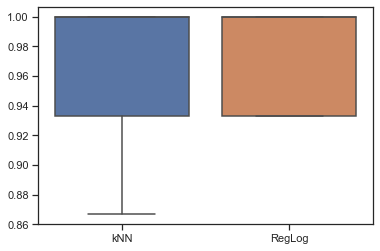

In [28]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

# <center><font color="blue">Naive Bayes Classifier</font></center>

<img alt="" src="images/naive_bayes.png" style="width: 400px ; height: 220px" />

* P(x) konstan, sehingga bisa diabaikan.
* Asumsi terkuatnya adalah independensi antar variabel prediktor (sehingga dikatakan &quot;Naive&quot;)
* Klasifikasi dilakukan dengan menghitung probabilitas untuk setiap kategori ketika diberikan data x = (x1,x2,...,xm)
* Variasi NBC adalah bagaimana P(c|x) dihitung, misal dengan distribusi Gaussian (Normal) - sering disebut sebagai Gaussian Naive Bayes (GNB):

<img alt="" src="images/Gaussian.png" style="width: 303px ; height: 50px" />

* Self readings: 
 * https://www.saedsayad.com/naive_bayesian.htm
 * https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

# <center><font color="blue">Kelebihan dan Kekurangan Naive Bayes Classifier</font></center>

<p><em><strong>Pros:</strong></em></p>

<ul>
	<li>Cepat dan mudah di implementasikan</li>
	<li>Cocok untuk permasalahan multiclass</li>
	<li>Jika asumsi terpenuhi (independent) biasanya performanya cukup baik dan membutuhkan data (training) yang lebih sedikit.</li>
	<li>Biasanya baik digunakan untuk prediktor kategorik, untuk numerik NBC mengasumsikan distribusi normal (terkadang tidak terpenuhi)&nbsp;</li>
</ul>

<p><em><strong>Cons:</strong></em></p>

<ul>
	<li>Jika di test data memuat kategori yang tidak ada di training data ( ==&gt; probabilitas = 0). Sering disebut sebagai masalah&nbsp; &ldquo;Zero Frequency&rdquo;.&nbsp;</li>
	<li>Asumsi yang sangat kuat (independen antar prediktor).</li>
</ul>


# <center><font color="blue">Naive Bayes di Social Media Analytics</font></center>

* Sentiment Analysis

<p><img alt="" src="images/SNA_Graph_Types.png" />

In [29]:
# Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html

gnb = GaussianNB()
nbc = gnb.fit(df1_train, y1_train)
y_nb1 = nbc.predict(df1_test)

print(confusion_matrix(y1_test, y_nb1))
print(classification_report(y1_test, y_nb1))

[[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [30]:
mulai = time.time()
scores_nb = cross_val_score(nbc, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Naive Bayes: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_nb.mean(), scores_nb.std() * 2, waktu))

Accuracy Naive Bayes: 0.95 (+/- 0.09), Waktu = 0.179 detik


kNN         0.866667
RegLog      0.933333
NaiveBys    0.866667
dtype: float64

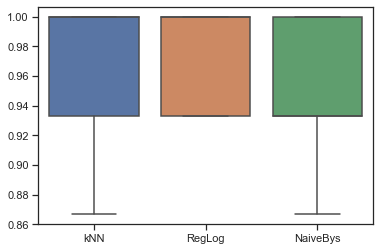

In [31]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb})
p = sns.boxplot(data = df_)
df_.min()

# <center><font color="blue">Decision Tree Analogi</font></center>
<img alt="" src="images/meme-cartoon/6_DT_meme.png" />

# <center><font color="blue">Decision Tree (Pohon Keputusan)</font></center>

<img alt="" src="images/tree_plot.png" />

# <center><font color="blue">Decision Tree (Pohon Keputusan): Contoh Aplikasi</font></center>

<img alt="" src="images/6_DT.png" />

# <center><font color="blue">Teori Decision Tree : Entropy Formula</font></center>
<p><img alt="" src="images/Entropy.png" /></p>

# <center><font color="blue">Teori Decision Tree : Entropy Calculation</font></center>

<p><img alt="" src="images/Contoh_Entropy.png" style="width: 469px; height: 339px;" /></p>

# <center><font color="blue">Teori Decision Tree : Gain Formula</font></center>
<p><img alt="" src="images/Information_Gain.png" /></p>

# <center><font color="blue">Teori Decision Tree : Gain Calculation</font></center>

<p><img style="undefined: undefined;" src="images/Contoh_Gain.png" alt="" width="527" height="370" /></p>
<ul>
<li>Contoh Lain: <a href="http://www.saedsayad.com/decision_tree.htm" target="_blank" rel="nofollow noopener">http://www.saedsayad.com/decision_tree.htm</a></li>
<li>Ross Quinlan Website: <a href="https://www.rulequest.com/Personal/" target="_blank" rel="nofollow noopener">https://www.rulequest.com/Personal/</a></li>
</ul>

# <center><font color="blue">Teori Decision Tree : Information theory</font></center>

<p><img src="images/dec_Tree_Theory.png" alt="" width="594" height="334" /></p>
<ul>
<li>Alternative to Information Gain : Gini Index (CART): <a href="https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1" target="_blank" rel="nofollow noopener">https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1</a></li>
</ul>

# <center><font color="blue"> Pengaruh "ketinggian" tree terhadap bentuk model</font></center>

<p><img alt="" src="images/Dec_Tree_Asumsi_Depth.png" /></p>

# <center><font color="blue">Decision Tree (Pohon Keputusan): Kelebihan & Kekurangan</font></center>

<p><u><strong>When to use:</strong></u></p>

<ul>
	<li>Target : Binomial/nominal.</li>
	<li>Predictors (input): binomial, nominal, and-or interval (ratio).</li>
</ul>

<p><u><strong>Advantage:</strong></u></p>

<ul>
	<li>Fast and embarrassingly parallel.</li>
	<li>Tanpa iterasi, cocok untuk&nbsp;Big Data technology (e.g. Hadoop)[map-reduce friendly]</li>
	<li>Interpretability</li>
	<li>Robust terhadap outliers &amp; missing values</li>
</ul>

<p><u><strong>Disadvantage:</strong></u></p>

<ul>
	<li>Non probabilistic (ad hoc heuristic) +/-</li>
	<li>Target dengan banyak kelas</li>
	<li>Sensitive (instability)</li>
</ul>


In [32]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier() 
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(df1_train, y1_train)
y_DT1 = DT.predict(df1_test)

print(confusion_matrix(y1_test, y_DT1))
print(classification_report(y1_test, y_DT1))

[[11  0  0]
 [ 0 15  0]
 [ 0  4 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.93      0.93      0.92        45
weighted avg       0.93      0.91      0.91        45



In [33]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.01933984, 0.        , 0.60633582, 0.37432434])

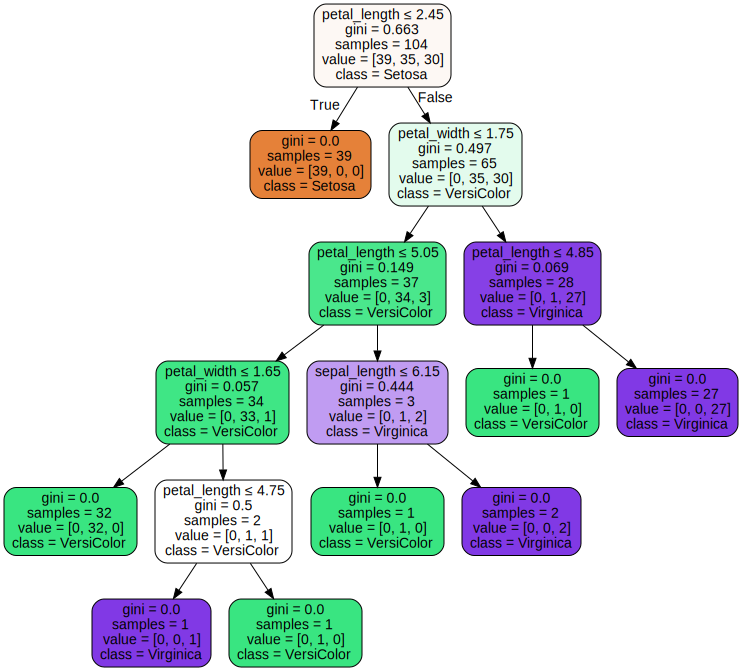

In [34]:
# Kelebihan lain Decision Tree yang tidak dimiliki model lain
# "WARNING" 
# 1. tidak bisa dijalankan di Google Colab
# 2. membutuhkan software "graphViz" + setting system variabel
# caranya ada disini: https://stackoverflow.com/questions/49471867/installing-graphviz-for-use-with-python-3-on-windows-10
import graphviz

dot_data = tree.export_graphviz(DT, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
var_names = ['sepal_length','sepal_width','petal_length','petal_width']
categories = ['Setosa', 'VersiColor', 'Virginica']
dot_data = tree.export_graphviz(DT, out_file=None, 
                         feature_names = var_names,  
                         class_names=categories,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [35]:
mulai = time.time()
scores_dt = cross_val_score(DT, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.95 (+/- 0.09), Waktu = 0.145 detik


kNN         0.866667
RegLog      0.933333
NaiveBys    0.866667
DecTree     0.866667
dtype: float64

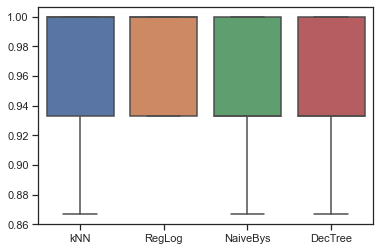

In [36]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

# <center><font color="blue">Curse of Dimensionality</font></center>

<p><img alt="" src="images/chd_1.PNG" />

# <center><font color="blue">Curse of Dimensionality & Random Forest</font></center>

<img alt="" src="images/5_RandomForest.png" style="width: 592px; height: 444px;" />

In [37]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf = RandomForestClassifier()
rf.fit(df1_train, y1_train)
y_rf1 = rf.predict(df1_test)

print(confusion_matrix(y1_test, y_rf1))
print(classification_report(y1_test, y_rf1))

[[11  0  0]
 [ 0 15  0]
 [ 0  4 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.93      0.93      0.92        45
weighted avg       0.93      0.91      0.91        45



Feature ranking:
1. feature 3 (0.453383)
2. feature 2 (0.430216)
3. feature 0 (0.095857)
4. feature 1 (0.020544)


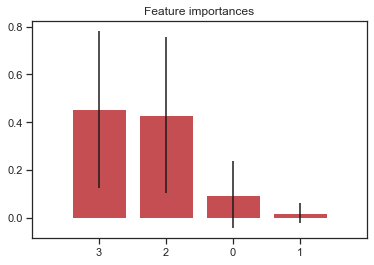

In [38]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(df1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df1.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(df1.shape[1]), indices)
plt.xlim([-1, df1.shape[1]])
plt.show()

In [39]:
mulai = time.time()
scores_rf = cross_val_score(rf, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Random Forest: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_rf.mean(), scores_rf.std() * 2, waktu))

Accuracy Random Forest: 0.96 (+/- 0.09), Waktu = 6.140 detik


kNN         0.866667
RegLog      0.933333
NaiveBys    0.866667
DecTree     0.866667
Forest      0.866667
dtype: float64

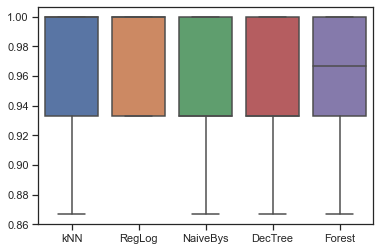

In [40]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt, "Forest": scores_rf})
p = sns.boxplot(data = df_)
df_.min()

# <center><font color="green">Model yang lebih kompleks belum tentu lebih baik, Mengapa?</font></center>

In [41]:
# Saving Results untuk digunakan di module selanjutnya
import pickle

f = open('data/data_Module-11.pckl', 'wb')
pickle.dump((df_, df1, y1, df2A, df2B, y2), f)
f.close()
"Done"

'Done'

# <center><font color="blue"> Akhir Modul 11 - Introduction to Classification models</font></center>

<hr />
<img alt="" src="images/meme-cartoon/Meme-on-Machine-Learning-accuracy.jpg" style="height: 400px;"/>